In [1]:
## Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
data = datasets.load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
features = pd.DataFrame(data['data'], columns=data['feature_names'])
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
### Let's use PCA decomposition for transformation
std_scaler = StandardScaler()
features_normalized = std_scaler.fit_transform(features)
pca = PCA(3)
feas_trans = pca.fit_transform(features_normalized)

In [5]:
feas_trans.shape

(150, 3)

In [11]:
dataset = pd.DataFrame(feas_trans, columns=['X', 'Y', 'Z'])
dataset['Target'] = data['target']
dataset.head()

,X,Y,Z,Target
0,-2.264703,0.480027,-0.127706,0
1,-2.080961,-0.674134,-0.234609,0
2,-2.364229,-0.341908,0.044201,0
3,-2.299384,-0.597395,0.091290,0
4,-2.389842,0.646835,0.015738,0


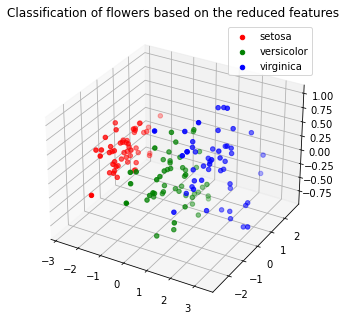

In [13]:
fig = plt.figure()
ax = Axes3D(fig)
colors = ['red', 'green', 'blue']
for i, name in enumerate(data['target_names']):
    filtered_data = dataset.loc[dataset.Target == i]
    X_data = filtered_data.X
    Y_data = filtered_data.Y
    Z_data = filtered_data.Z
    ax.scatter3D(X_data, Y_data, Z_data, c = colors[i], label=name)
c = ax.set_title("Classification of flowers based on the reduced features")
ax.legend()
plt.show()